In [ ]:
pip install tensorflow numpy matplotlib


170498071/170498071 [==============================] - 2s 0us/step
Epoch 1/10
1250/1250 [==============================] - 37s 29ms/step - loss: 1.5813 - accuracy: 0.4192 - val_loss: 1.3411 - val_accuracy: 0.5197
Epoch 2/10
1250/1250 [==============================] - 30s 24ms/step - loss: 1.2206 - accuracy: 0.5666 - val_loss: 1.1444 - val_accuracy: 0.5918
Epoch 3/10
1250/1250 [==============================] - 31s 25ms/step - loss: 1.0729 - accuracy: 0.6206 - val_loss: 1.0625 - val_accuracy: 0.6278
Epoch 4/10
1250/1250 [==============================] - 32s 26ms/step - loss: 0.9761 - accuracy: 0.6570 - val_loss: 1.0108 - val_accuracy: 0.6464
Epoch 5/10
1250/1250 [==============================] - 32s 25ms/step - loss: 0.8939 - accuracy: 0.6897 - val_loss: 0.9592 - val_accuracy: 0.6678
Epoch 6/10
1250/1250 [==============================] - 31s 25ms/step - loss: 0.8357 - accuracy: 0.7057 - val_loss: 0.9280 - val_accuracy: 0.6783
Epoch 7/10
1250/1250 [==============================] - 3

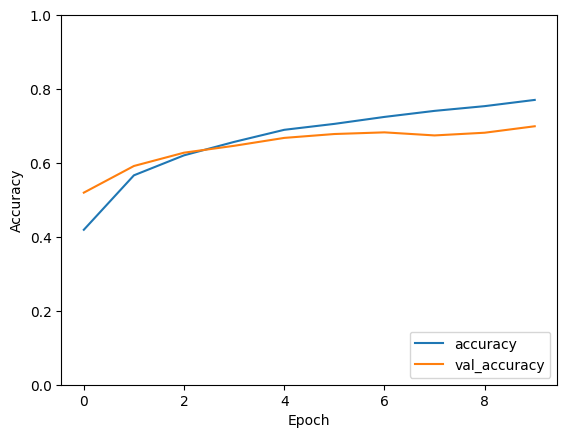

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

# Define the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Plot training history (optional)
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()
